### UC Irvine Machine Learning Repository

https://archive.ics.uci.edu/

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
import nltk
#nltk.download_shell()

In [23]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
messages[100]

"ham\tPlease don't text me anymore. I have nothing else to say."

### Enumerating the messages

In [24]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

### Separating the messages ina data frame

In [26]:
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


messages.describe()

### Analising describe method by label

In [30]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

### Creating a message length column

In [31]:
messages['length'] = messages['message'].apply(len)
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


### Plotting the messages by length

<Axes: ylabel='Frequency'>

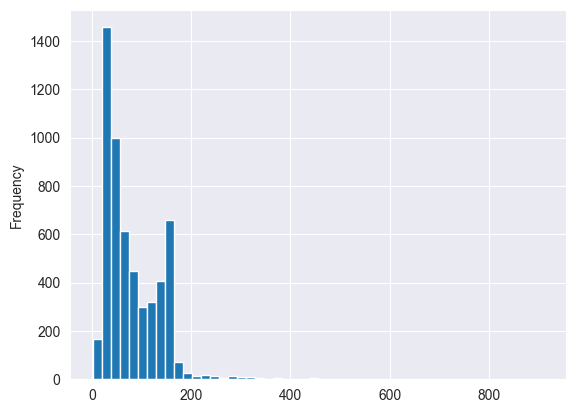

In [34]:
messages['length'].plot.hist(bins=50)

### Analising the messages length 

In [35]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [59]:
messages[messages['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [58]:
messages.iloc[1085,1]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

### Analising the length of ham and spam

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

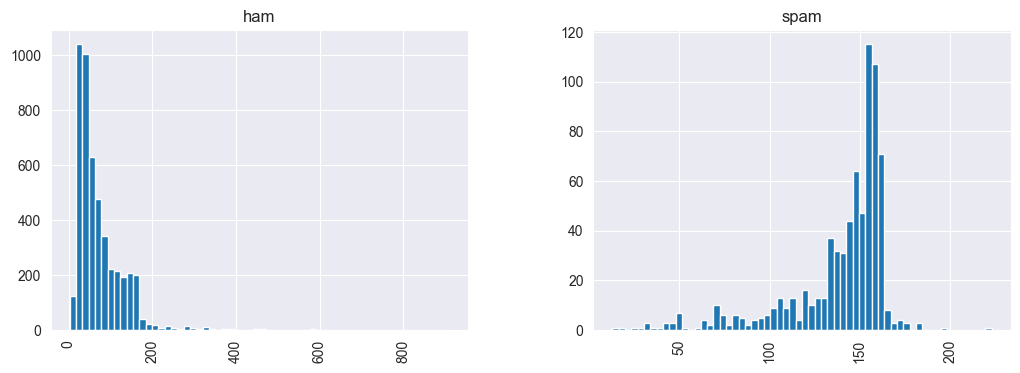

In [60]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

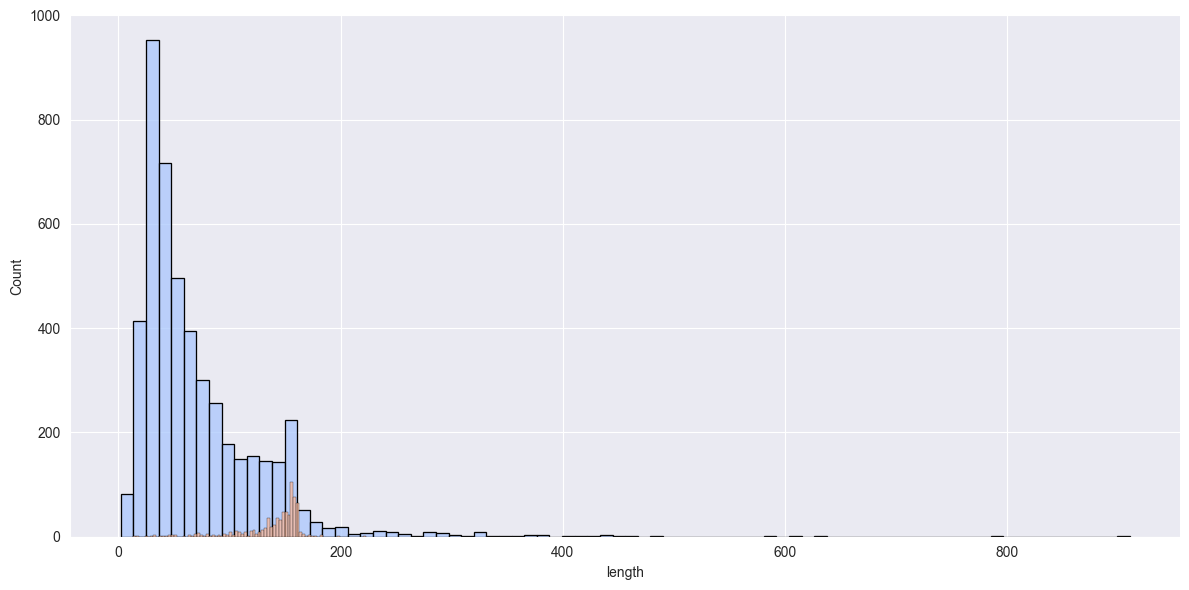

In [64]:
g = sns.FacetGrid(messages,hue='label',palette='coolwarm',height=6,aspect=2)
g.map(sns.histplot,'length',bins=80,edgecolor='black')

### Removing ponctuation

In [74]:
examp = 'Sample, message! it! Has$ No ponctuation?' 

In [75]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [76]:
no_p = [c for c in examp if c not in string.punctuation]
no_p

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'H',
 'a',
 's',
 ' ',
 'N',
 'o',
 ' ',
 'p',
 'o',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

### Using stop words

In [83]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Getting the key words

In [80]:
no_p = ''.join(no_p)
no_p

'Sample message it Has No ponctuation'

In [81]:
no_p.split()

['Sample', 'message', 'it', 'Has', 'No', 'ponctuation']

In [82]:
clean_examp = [w for w in no_p.split() if w.lower() not in stopwords.words('english')]
clean_examp

['Sample', 'message', 'ponctuation']

### Creating a function to do the same steps as the example in the messages 

In [84]:
def text_process(mess):
    
    # 1. Remove ponctuation 
    # 2. Remove stop words
    # 3. Return list of clean text words
    
    no_p = [l for l in mess if l not in string.punctuation]
    
    no_p = ''.join(no_p)
    
    return [w for w in no_p.split() if w.lower() not in stopwords.words('english')]

### Applying the function in the messages

In [86]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Creating a count vectorizer

In [92]:
bow_trans = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [93]:
print(len(bow_trans.vocabulary_))

11425


### Creating the bag of words sparse matrix

In [94]:
mess_bow = bow_trans.transform(messages['message'])

In [97]:
print('Shape of Sparse Matrix: ', mess_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


### Using tfidf transformer to create a weght value to each word

In [100]:
t_trans = TfidfTransformer().fit(mess_bow)

### Checking the inverse document frenquency of a particular word

In [105]:
t_trans.idf_[bow_trans.vocabulary_['love']]

4.773658523649919

### Converting the BOW into a TFIDF

In [109]:
mess_t = t_trans.transform(mess_bow)

### Using a naive bayse algorithm to detect spams

In [111]:
spam_det = MultinomialNB().fit(mess_t,messages['label'])

In [113]:
all_pred = spam_det.predict(mess_t)
all_pred.tolist()

['ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',

### Spliting the data in train and test 

In [117]:
X = messages['message']
y = messages['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creating a pipeline to do all I did before 

In [118]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [119]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fce10fefc70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predicting

In [120]:
pred = pipeline.predict(X_test)

### Creating a class report and a confusion matrix

In [122]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.73      0.85       224

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672



[[1448    0]
 [  60  164]]
